<a href="https://colab.research.google.com/github/ShubhamSarkar123/DataScienceDataAnalysisMachineLearning/blob/main/04_Tesla_Stock_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TSLA (1).csv to TSLA (1).csv


In [4]:
data = pd.read_csv("TSLA (1).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-26,166.899994,166.919998,163.141998,163.774002,163.774002,40448500
1,2020-05-27,164.171997,165.542007,157.000000,164.046005,164.046005,57747500
2,2020-05-28,162.701996,164.949997,160.337997,161.162003,161.162003,36278000
3,2020-05-29,161.750000,167.000000,160.841995,167.000000,167.000000,58822500
4,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500


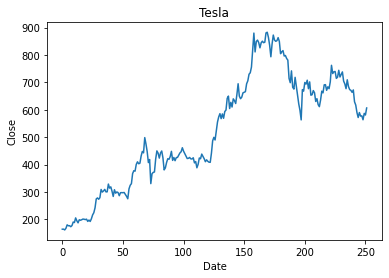

In [6]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [7]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [8]:
model = Prophet()  #we are using facebook prophet model
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-05-20,43.491516,-523.453260,552.288069
613,2022-05-21,35.675969,-537.191546,569.332842
614,2022-05-22,34.101894,-549.900265,554.091316
615,2022-05-23,37.259086,-548.952943,548.938153
616,2022-05-24,39.064921,-544.526900,566.570691


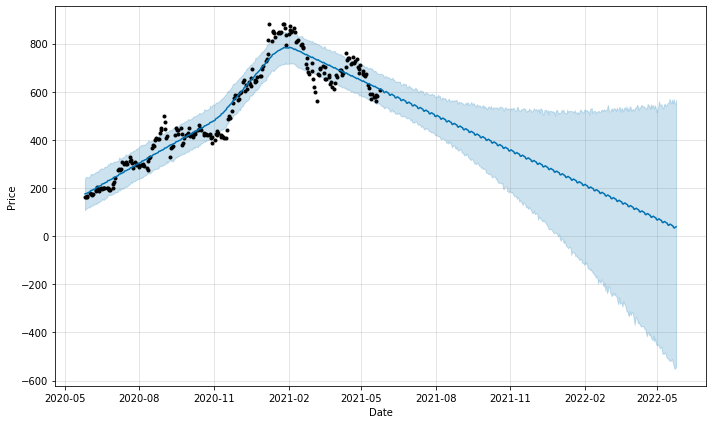

In [9]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")